In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import scipy.io as scio
import numpy as np
import os
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [5]:
inputspath = "/content/drive/My Drive/Colab Notebooks/patch/X.csv"
labelspath = "/content/drive/My Drive/Colab Notebooks/patch/y.csv"
X = pd.read_csv(inputspath)
y = pd.read_csv(labelspath)

In [6]:
X.fillna(0, inplace=True)
X.head(10)
X.describe

<bound method NDFrame.describe of               0          1          2          3  ...  188  189  190  191
0     15.071579  15.050000  15.073158  15.095789  ...  1.0  1.0  1.0  1.0
1     15.132105  15.126316  15.152632  15.095789  ...  1.0  1.0  1.0  1.0
2     14.366316  14.306316  14.262105  14.248421  ...  1.0  1.0  1.0  1.0
3     17.082632  17.153684  17.159474  17.168947  ...  1.0  1.0  1.0  1.0
4     15.228947  15.212105  15.170526  15.147895  ...  1.0  1.0  1.0  1.0
...         ...        ...        ...        ...  ...  ...  ...  ...  ...
3335  13.582632  13.450000  13.349474  13.264211  ...  1.0  1.0  1.0  1.0
3336  14.077895  14.063158  14.045263  14.041579  ...  1.0  1.0  1.0  1.0
3337  14.053684  14.051579  14.041053  14.022105  ...  1.0  1.0  1.0  1.0
3338  14.132105  14.120000  14.106842  14.121579  ...  1.0  1.0  1.0  1.0
3339  14.537895  14.480526  14.414211  14.314211  ...  1.0  1.0  1.0  1.0

[3340 rows x 192 columns]>

In [7]:
y.fillna(0, inplace=True)
y.head(10)
y.describe

<bound method NDFrame.describe of       0
0     0
1     0
2     0
3     1
4     0
...  ..
3335  0
3336  0
3337  0
3338  1
3339  0

[3340 rows x 1 columns]>

In [8]:
np.sum(y)

0    1474
dtype: int64

# Simple modelling

In [9]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor

In [10]:
model = RandomForestClassifier() 
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.74550898 0.60179641 0.58682635 0.7245509  0.70359281 0.85928144
 0.7994012  0.75748503 0.8502994  0.83832335]
0.7467065868263474


# Training/Testing set split

In [11]:
data = pd.concat([X, y], axis=1)
data.shape

(3340, 193)

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.2, random_state=1024 )

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2672, 192)
(2672, 1)
(668, 192)
(668, 1)


# RF-GridSearch

In [36]:
ave_score_RF = []

for i in range(10):

  X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.2)

  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)

  RF = RandomForestClassifier()
  param_grid = { 
            "n_estimators" : [9, 18, 27, 36, 100, 150],
            "max_depth" : [2,3,5,6,7,9],
            "min_samples_leaf" : [2, 4, 6, 8]}
  RF_grid = GridSearchCV(RF, param_grid=param_grid, cv=5)
  RF_grid.fit(X_train, y_train)
  best_est_RF = RF_grid.best_estimator_

  # print(RF_grid.best_params_)
  # print(best_est_RF)

  print('Accuracy of classifier on training set: {:.2f}%'.format(RF_grid.score(X_train, y_train) * 100))
  print('Accuracy of classifier on test set: {:.2f}%'.format(RF_grid.score(X_test, y_test) * 100))

  # scores = cross_val_score(best_est_RF, X_train, y_train, cv=10, scoring='accuracy')
  # print(scores)
  # print(scores.mean())

  ave_score_RF.append(RF_grid.score(X_test, y_test))


Accuracy of classifier on training set: 96.82%
Accuracy of classifier on test set: 88.32%
Accuracy of classifier on training set: 96.67%
Accuracy of classifier on test set: 87.72%
Accuracy of classifier on training set: 96.59%
Accuracy of classifier on test set: 88.92%
Accuracy of classifier on training set: 96.59%
Accuracy of classifier on test set: 89.37%
Accuracy of classifier on training set: 96.11%
Accuracy of classifier on test set: 90.42%
Accuracy of classifier on training set: 95.88%
Accuracy of classifier on test set: 88.62%
Accuracy of classifier on training set: 96.44%
Accuracy of classifier on test set: 91.02%
Accuracy of classifier on training set: 96.18%
Accuracy of classifier on test set: 89.67%
Accuracy of classifier on training set: 96.56%
Accuracy of classifier on test set: 91.32%
Accuracy of classifier on training set: 96.63%
Accuracy of classifier on test set: 89.67%
0.9678143712574852


In [39]:
print(np.mean(ave_score_RF))

0.9678143712574852


# XGBoost - RandomizedSearch

In [37]:
ave_score = []

for i in range(10):

  X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.2)

  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)

  XGB = XGBClassifier(n_jobs=-1, objective = 'binary:logistic') 
  
  param_grid = {
                    'n_estimators'     : [100,150,200,250,300],
                    "learning_rate"    : [0.01, 0.03, 0.10 ],
                    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                    "colsample_bytree" : [0.5,0.7],
                    'max_depth'        : [3,4,6,8]
                }
  XGB_random = RandomizedSearchCV(XGB, param_distributions=param_grid, cv=5)
  XGB_random.fit(X_train,y_train)
  best_est_XGB = XGB_random.best_estimator_

  # print(XGB_random.best_params_)
  # print(best_est_XGB)

  print('Accuracy of classifier on training set: {:.2f}'.format(XGB_random.score(X_train, y_train) * 100))
  print('Accuracy of classifier on test set: {:.2f}'.format(XGB_random.score(X_test, y_test) * 100))

  # scores = cross_val_score(best_est_XGB, X_train, y_train, cv=10, scoring='accuracy')
  # print(scores)
  # print(scores.mean())

  ave_score.append(XGB_random.score(X_test, y_test))

Accuracy of classifier on training set: 99.03
Accuracy of classifier on test set: 90.27
Accuracy of classifier on training set: 98.65
Accuracy of classifier on test set: 92.22
Accuracy of classifier on training set: 98.91
Accuracy of classifier on test set: 91.62
Accuracy of classifier on training set: 98.76
Accuracy of classifier on test set: 92.96
Accuracy of classifier on training set: 98.73
Accuracy of classifier on test set: 92.66
Accuracy of classifier on training set: 98.88
Accuracy of classifier on test set: 92.07
Accuracy of classifier on training set: 98.84
Accuracy of classifier on test set: 90.87
Accuracy of classifier on training set: 98.47
Accuracy of classifier on test set: 90.27
Accuracy of classifier on training set: 98.91
Accuracy of classifier on test set: 91.92
Accuracy of classifier on training set: 98.62
Accuracy of classifier on test set: 90.87


In [38]:
print(np.mean(ave_score))

0.9157185628742515


# CNN

In [72]:
import tensorflow as tf
from tensorflow.keras import Sequential,activations
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D,Conv2D,MaxPooling1D,MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D,Activation,Input,Add,Dense,ZeroPadding2D,Flatten
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.models import Model
from keras import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

## Model 1 - Conv1D

In [ ]:
X_train_1 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_1 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_1.shape)
print(X_test_1.shape)

(2672, 192, 1)
(668, 192, 1)


In [ ]:
model_1=Sequential()
model_1.add(Conv1D(32,3,activation='relu',input_shape=X_train_1[0].shape,kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_1.add(BatchNormalization())
# model.add(Dropout(0.2))

model_1.add(Conv1D(64,3,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_1.add(BatchNormalization())
# model.add(Dropout(0.1))

model_1.add(Conv1D(32,3,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_1.add(BatchNormalization())
# model.add(Dropout(0.1))

model_1.add(Conv1D(16,3,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_1.add(BatchNormalization())

model_1.add(Flatten())
model_1.add(Dense(16,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
# model.add(Dense(16,activation='relu',kernel_regularizer='l1'))
# model.add(Dropout(0.5))

model_1.add(Dense(1,activation='sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 190, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 190, 32)           128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 188, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 188, 64)           256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 186, 32)           6176      
_________________________________________________________________
batch_normalization_2 (Batch (None, 186, 32)           128       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 184, 16)           1

In [ ]:
model_1.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
reduce_lr_1 = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=5,min_lr=1e-10)
history_1 = model_1.fit(X_train_1,y_train,epochs=50,validation_data=(X_test_1,y_test),callbacks=[reduce_lr_1])

Epoch 1/50
84/84 [==============================] - 2s 20ms/step - loss: 16.9592 - accuracy: 0.7328 - val_loss: 11.0077 - val_accuracy: 0.7635
Epoch 2/50
84/84 [==============================] - 1s 9ms/step - loss: 8.1329 - accuracy: 0.8110 - val_loss: 6.0860 - val_accuracy: 0.5928
Epoch 3/50
84/84 [==============================] - 1s 10ms/step - loss: 4.5300 - accuracy: 0.8147 - val_loss: 3.6544 - val_accuracy: 0.6093
Epoch 4/50
84/84 [==============================] - 1s 9ms/step - loss: 2.8407 - accuracy: 0.8061 - val_loss: 2.5102 - val_accuracy: 0.5853
Epoch 5/50
84/84 [==============================] - 1s 9ms/step - loss: 2.0518 - accuracy: 0.8028 - val_loss: 1.9590 - val_accuracy: 0.8204
Epoch 6/50
84/84 [==============================] - 1s 10ms/step - loss: 1.6183 - accuracy: 0.8151 - val_loss: 1.6150 - val_accuracy: 0.8368
Epoch 7/50
84/84 [==============================] - 1s 10ms/step - loss: 1.3697 - accuracy: 0.8129 - val_loss: 1.3793 - val_accuracy: 0.7829
Epoch 8/50
84/

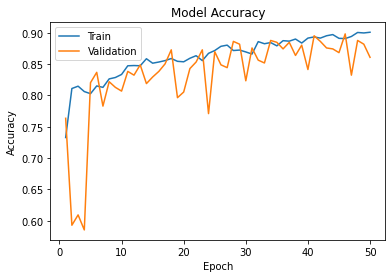

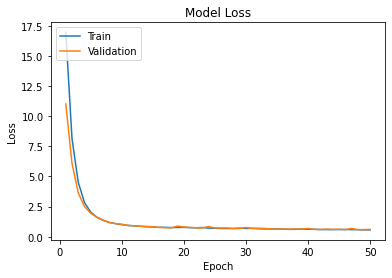

In [ ]:
plotLearningCurve(history_1,50)

## Model 2 - Conv1D

In [ ]:
X_train_2 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_2 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_2.shape)
print(X_test_2.shape)

(2672, 192, 1)
(668, 192, 1)


In [ ]:
model_2=Sequential()
model_2.add(Conv1D(32,3,activation='relu',input_shape=X_train_2[0].shape,kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(BatchNormalization())
# model_2.add(MaxPooling1D(pool_size=3,strides=1,padding='same'))

model_2.add(Conv1D(64,3,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(BatchNormalization())
# model_2.add(MaxPooling1D(pool_size=3,strides=1,padding='same'))

model_2.add(Conv1D(128,3,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling1D(pool_size=3,strides=1,padding='same'))

model_2.add(Conv1D(256,3,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling1D(pool_size=3,strides=1,padding='same'))

model_2.add(Conv1D(512,3,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling1D(pool_size=3,strides=1,padding='same'))

model_2.add(Flatten())
model_2.add(Dense(64,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(Dropout(0.1))
model_2.add(Dense(32,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(Dropout(0.1))
model_2.add(Dense(16,activation='relu',kernel_regularizer='l1',kernel_initializer="he_uniform"))
model_2.add(Dense(1,activation='sigmoid'))

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 190, 32)           128       
_________________________________________________________________
batch_normalization_21 (Batc (None, 190, 32)           128       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 188, 64)           6208      
_________________________________________________________________
batch_normalization_22 (Batc (None, 188, 64)           256       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 186, 128)          24704     
_________________________________________________________________
batch_normalization_23 (Batc (None, 186, 128)          512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 186, 128)         

Epoch 1/50
84/84 [==============================] - 2s 26ms/step - loss: 156.1955 - accuracy: 0.5707 - val_loss: 41.1940 - val_accuracy: 0.5584
Epoch 2/50
84/84 [==============================] - 2s 18ms/step - loss: 23.6483 - accuracy: 0.6684 - val_loss: 15.1008 - val_accuracy: 0.5584
Epoch 3/50
84/84 [==============================] - 2s 18ms/step - loss: 12.5750 - accuracy: 0.7358 - val_loss: 11.3366 - val_accuracy: 0.5584
Epoch 4/50
84/84 [==============================] - 2s 18ms/step - loss: 10.6460 - accuracy: 0.7552 - val_loss: 10.3471 - val_accuracy: 0.5584
Epoch 5/50
84/84 [==============================] - 2s 18ms/step - loss: 9.8208 - accuracy: 0.7751 - val_loss: 9.6858 - val_accuracy: 0.5584
Epoch 6/50
84/84 [==============================] - 2s 18ms/step - loss: 9.2659 - accuracy: 0.7751 - val_loss: 9.1932 - val_accuracy: 0.5659
Epoch 7/50
84/84 [==============================] - 2s 18ms/step - loss: 8.8689 - accuracy: 0.7725 - val_loss: 8.8221 - val_accuracy: 0.6931
Epoc

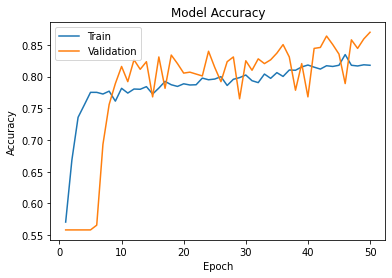

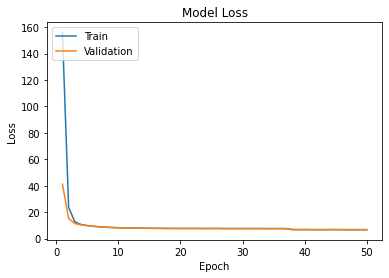

In [ ]:
model_2.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=5,min_lr=1e-10)
history_2 = model_2.fit(X_train_2,y_train,epochs=50,validation_data=(X_test_2,y_test),callbacks=[reduce_lr_2])
plotLearningCurve(history_2,50)

## Conv2D

In [129]:
data_2D = np.load("/content/drive/My Drive/Colab Notebooks/patch/data_2D.npz")

X_2D = data_2D["arr_0"]
y_2D = data_2D["arr_1"]

X_2D[np.isnan(X_2D)]=0
y_2D[np.isnan(y_2D)]=0

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42, shuffle=True)

# X_train_3 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_3 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_3.shape)
print(X_test_3.shape)


(2672, 32, 32, 1)
(668, 32, 32, 1)


In [130]:
model_3=Sequential()
model_3.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=X_train_3[0].shape,kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
# model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
# model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Flatten())
model_3.add(Dense(64,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
model_3.add(Dropout(0.2))
model_3.add(Dense(32,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
model_3.add(Dropout(0.2))
model_3.add(Dense(16,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
# model.add(Dropout(0.1))
model_3.add(Dense(1,activation='sigmoid'))


model_3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_90 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_91 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_92 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 16, 16, 64)      

In [131]:
model_3.compile(optimizer=Adam(learning_rate=0.0003),loss='binary_crossentropy',metrics=['accuracy'])
reduce_lr_3 = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=5,min_lr=1e-10)
history_3 = model_3.fit(X_train_3,y_train_3,epochs=50,validation_data=(X_test_3,y_test_3),callbacks=[reduce_lr_3])


Epoch 1/50
84/84 [==============================] - 1s 11ms/step - loss: 12.1103 - accuracy: 0.5240 - val_loss: 11.0165 - val_accuracy: 0.5868
Epoch 2/50
84/84 [==============================] - 1s 8ms/step - loss: 10.0388 - accuracy: 0.5573 - val_loss: 9.0895 - val_accuracy: 0.6287
Epoch 3/50
84/84 [==============================] - 1s 8ms/step - loss: 8.2534 - accuracy: 0.5865 - val_loss: 7.4493 - val_accuracy: 0.6377
Epoch 4/50
84/84 [==============================] - 1s 8ms/step - loss: 6.7984 - accuracy: 0.6156 - val_loss: 6.1637 - val_accuracy: 0.6407
Epoch 5/50
84/84 [==============================] - 1s 8ms/step - loss: 5.6479 - accuracy: 0.6504 - val_loss: 5.1881 - val_accuracy: 0.5943
Epoch 6/50
84/84 [==============================] - 1s 8ms/step - loss: 4.7625 - accuracy: 0.6785 - val_loss: 4.4229 - val_accuracy: 0.6317
Epoch 7/50
84/84 [==============================] - 1s 8ms/step - loss: 4.0788 - accuracy: 0.7002 - val_loss: 3.8761 - val_accuracy: 0.6407
Epoch 8/50
84/84

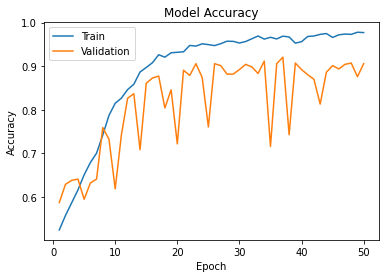

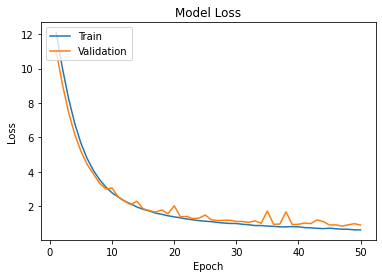

In [132]:
plotLearningCurve(history_3,50)

# ResNet

In [143]:
def identity_block(X, f, filters, stage, block):
 
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
 
    F1, F2, F3 = filters
 
    X_shortcut = X
 
    X = Conv2D(filters = F1, kernel_size = (1,1), strides = (1,1), padding = 'same', name = conv_name_base + '2a', kernel_regularizer='l1', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_regularizer='l1', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'same', name = conv_name_base + '2c', kernel_regularizer='l1', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
 
    return X

def convolutional_block(X, f, filters, stage, block, s=2):
 
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
 
    X_shortcut = X
 
    X = Conv2D(filters = F1, kernel_size = (1,1), strides = (s,s), padding = 'same', name = conv_name_base + '2a', kernel_regularizer='l1', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_regularizer='l1', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'same', name = conv_name_base + '2c', kernel_regularizer='l1', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
 
    X_shortcut = Conv2D(F3, (1,1), strides = (s,s), padding = 'same', name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name=bn_name_base + '1')(X_shortcut)
 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
 
    return X

def ResNet50(input_shape = (32, 32, 1), classes = 1):
 
    X_input = Input(input_shape)
 
    # X = ZeroPadding2D((3, 3))(X_input)
 
    X = Conv2D(64, (7, 7), strides = (2,2), padding = 'same', name = 'conv1', kernel_regularizer='l1', kernel_initializer = glorot_uniform(seed=0))(X_input)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides = (2,2), padding = 'same')(X)
 
    X = convolutional_block(X, f = 3, filters = [64,64,256], stage = 2, block = 'a', s = 1)
    X = identity_block(X, 3, [64,64,256], stage=2, block='b')
    X = identity_block(X, 3, [64,64,256], stage=2, block='c')
 
    X = convolutional_block(X, f = 3, filters = [128,128,512], stage = 3, block = 'a', s = 2)
    X = identity_block(X, 3, [128,128,512], stage=3, block='b')
    X = identity_block(X, 3, [128,128,512], stage=3, block='c')
    X = identity_block(X, 3, [128,128,512], stage=3, block='d')
 
    X = convolutional_block(X, f = 3, filters = [256,256,1024], stage = 4, block = 'a', s = 2)
    X = identity_block(X, 3, [256,256,1024], stage=4, block='b')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='c')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='d')    
    X = identity_block(X, 3, [256,256,1024], stage=4, block='e')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='f')
 
    X = convolutional_block(X, f = 3, filters = [512,512,2048], stage = 5, block = 'a', s = 2)
    X = identity_block(X, 3, [512,512,2048], stage=5, block='b')
    X = identity_block(X, 3, [512,512,2048], stage=5, block='c')
 
    X = AveragePooling2D((2, 2), name='avg_pool', padding = 'same')(X)
 
    X = Flatten()(X)
    X = Dense(classes, activation = 'sigmoid', name = 'fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
 
    model = Model(inputs = X_input, outputs = X, name = 'ResNet50')
 
    return model

In [144]:
model_4 = ResNet50(input_shape = (32, 32, 1), classes = 1)
model_4.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
reduce_lr_4 = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=5,min_lr=1e-10)
history_4 = model_4.fit(X_train_3,y_train_3,epochs=50,validation_data=(X_test_3,y_test_3),callbacks=[reduce_lr_4])

Epoch 1/50
84/84 [==============================] - 5s 54ms/step - loss: 3985.5710 - accuracy: 0.5614 - val_loss: 3455.4761 - val_accuracy: 0.5599
Epoch 2/50
84/84 [==============================] - 4s 43ms/step - loss: 3016.7573 - accuracy: 0.5928 - val_loss: 2602.3311 - val_accuracy: 0.6362
Epoch 3/50
84/84 [==============================] - 4s 43ms/step - loss: 2281.6965 - accuracy: 0.6381 - val_loss: 1991.5327 - val_accuracy: 0.5958
Epoch 4/50
84/84 [==============================] - 4s 43ms/step - loss: 1767.8463 - accuracy: 0.6868 - val_loss: 1550.7985 - val_accuracy: 0.5584
Epoch 5/50
84/84 [==============================] - 4s 43ms/step - loss: 1369.5345 - accuracy: 0.7062 - val_loss: 1196.8821 - val_accuracy: 0.5584
Epoch 6/50
84/84 [==============================] - 4s 43ms/step - loss: 1058.2147 - accuracy: 0.7369 - val_loss: 929.1032 - val_accuracy: 0.5958
Epoch 7/50
84/84 [==============================] - 4s 43ms/step - loss: 830.2629 - accuracy: 0.7305 - val_loss: 739.29

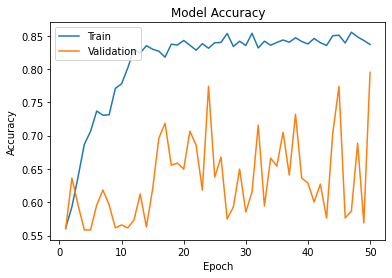

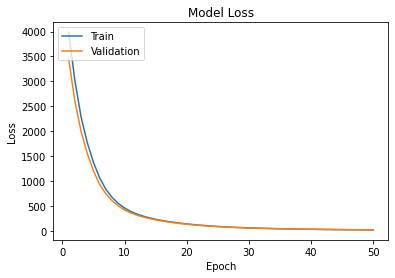

In [145]:
plotLearningCurve(history_4,50)